<a href="https://colab.research.google.com/github/nananana25/MSC151/blob/main/Group_7_(GBPIDR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparation

In [ ]:
import pandas as pd

excel_file_path = '/content/world_bank_data_2025.csv'
df = pd.read_csv(excel_file_path)

print(df.columns)

Index(['country_name', 'country_id', 'year', 'Inflation (CPI %)',
       'GDP (Current USD)', 'GDP per Capita (Current USD)',
       'Unemployment Rate (%)', 'Interest Rate (Real, %)',
       'Inflation (GDP Deflator, %)', 'GDP Growth (% Annual)',
       'Current Account Balance (% GDP)', 'Government Expense (% of GDP)',
       'Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)',
       'Gross National Income (USD)', 'Public Debt (% of GDP)'],
      dtype='object')


### Filtering Data for United Kingdom and Indonesia

### Handling Missing Values

In [ ]:
import pandas as pd

excel_file_path = '/content/world_bank_data_2025.csv'
df = pd.read_csv(excel_file_path)

# Filter the DataFrame for 'United Kingdom' and 'Indonesia'
countries_of_interest = ['United Kingdom', 'Indonesia']
df_filtered = df[df['country_name'].isin(countries_of_interest)].copy()

numerical_cols = df_filtered.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Missing values before imputation:")
print(df_filtered.isnull().sum())

Missing values before imputation:
country_name                        0
country_id                          0
year                                0
Inflation (CPI %)                   3
GDP (Current USD)                   4
GDP per Capita (Current USD)        4
Unemployment Rate (%)               2
Interest Rate (Real, %)            13
Inflation (GDP Deflator, %)         4
GDP Growth (% Annual)               4
Current Account Balance (% GDP)     4
Government Expense (% of GDP)      18
Government Revenue (% of GDP)      18
Tax Revenue (% of GDP)             18
Gross National Income (USD)         4
Public Debt (% of GDP)             18
dtype: int64


As you can see, several columns have missing values, with `Interest Rate (Real, %)` and the government-related metrics having a significant number of NaNs.

For a general approach, we can impute the missing numerical values with the mean of their respective columns. This helps maintain the overall distribution of the data for each feature. For categorical columns (like `country_name` or `country_id`), we won't impute as they have no missing values.

In [ ]:
# Identify numerical columns for imputation (excluding 'year' as it has no missing values)
numerical_cols = df_filtered.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Remove 'year' from the list if it's there, as it has no NaNs and shouldn't be imputed
if 'year' in numerical_cols:
    numerical_cols.remove('year')

for col in numerical_cols:
    if df_filtered[col].isnull().any(): # Check if the column actually has missing values
        mean_value = df_filtered[col].mean()
        df_filtered[col] = df_filtered[col].fillna(mean_value) # Corrected line: removed inplace=True and reassigned

print("\nMissing values after mean imputation:")
print(df_filtered.isnull().sum())

display(df_filtered.head())


Missing values after mean imputation:
country_name                       0
country_id                         0
year                               0
Inflation (CPI %)                  0
GDP (Current USD)                  0
GDP per Capita (Current USD)       0
Unemployment Rate (%)              0
Interest Rate (Real, %)            0
Inflation (GDP Deflator, %)        0
GDP Growth (% Annual)              0
Current Account Balance (% GDP)    0
Government Expense (% of GDP)      0
Government Revenue (% of GDP)      0
Tax Revenue (% of GDP)             0
Gross National Income (USD)        0
Public Debt (% of GDP)             0
dtype: int64


,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
1088,United Kingdom,gb,2010,2.492655,2.485483e+12,39598.957120,7.924,-1.072045,1.589081,2.233315,-2.771841,44.137806,38.266939,25.273398,2.486575e+12,131.087941
1089,United Kingdom,gb,2011,3.856112,2.663806e+12,42109.641880,8.169,-1.659550,2.195994,1.138362,-1.630970,42.700365,33.506758,25.834932,2.674933e+12,143.759015
1090,United Kingdom,gb,2012,2.573235,2.707090e+12,42497.340497,8.250,-1.026901,1.542743,1.508998,-3.147189,43.332118,32.865383,25.103066,2.681874e+12,147.053682
1091,United Kingdom,gb,2013,2.291667,2.784854e+12,43426.298141,7.704,-1.576192,2.109441,1.799921,-4.651194,40.204372,33.726067,25.136342,2.735499e+12,141.643328
1092,United Kingdom,gb,2014,1.451120,3.064708e+12,47439.616590,6.363,-0.808243,1.318903,3.194637,-5.011417,39.409959,32.883296,24.880511,3.009960e+12,150.591620


In [ ]:
import numpy as np

# Filter the DataFrame for 'United Kingdom' and 'Indonesia'
countries_of_interest = ['United Kingdom', 'Indonesia']
df_filtered = df[df['country_name'].isin(countries_of_interest)].copy()

print(f"Filtered data for {', '.join(countries_of_interest)}:")
display(df_filtered.head())

print("\nDataFrame Info for filtered data:")
df_filtered.info()

Filtered data for United Kingdom, Indonesia:


,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
1088,United Kingdom,gb,2010,2.492655,2.485483e+12,39598.957120,7.924,-1.072045,1.589081,2.233315,-2.771841,44.137806,38.266939,25.273398,2.486575e+12,131.087941
1089,United Kingdom,gb,2011,3.856112,2.663806e+12,42109.641880,8.169,-1.659550,2.195994,1.138362,-1.630970,42.700365,33.506758,25.834932,2.674933e+12,143.759015
1090,United Kingdom,gb,2012,2.573235,2.707090e+12,42497.340497,8.250,-1.026901,1.542743,1.508998,-3.147189,43.332118,32.865383,25.103066,2.681874e+12,147.053682
1091,United Kingdom,gb,2013,2.291667,2.784854e+12,43426.298141,7.704,-1.576192,2.109441,1.799921,-4.651194,40.204372,33.726067,25.136342,2.735499e+12,141.643328
1092,United Kingdom,gb,2014,1.451120,3.064708e+12,47439.616590,6.363,-0.808243,1.318903,3.194637,-5.011417,39.409959,32.883296,24.880511,3.009960e+12,150.591620



DataFrame Info for filtered data:
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1088 to 1407
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     32 non-null     object 
 1   country_id                       32 non-null     object 
 2   year                             32 non-null     int64  
 3   Inflation (CPI %)                29 non-null     float64
 4   GDP (Current USD)                28 non-null     float64
 5   GDP per Capita (Current USD)     28 non-null     float64
 6   Unemployment Rate (%)            30 non-null     float64
 7   Interest Rate (Real, %)          19 non-null     float64
 8   Inflation (GDP Deflator, %)      28 non-null     float64
 9   GDP Growth (% Annual)            28 non-null     float64
 10  Current Account Balance (% GDP)  28 non-null     float64
 11  Government Expense (% of GDP)    14 non-null     fl

In [ ]:
print("First 5 rows of the DataFrame:")
display(df.head())

First 5 rows of the DataFrame:


,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN


In [ ]:
print("DataFrame Info (data types and non-null counts):")
df.info()

DataFrame Info (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     3472 non-null   object 
 1   country_id                       3472 non-null   object 
 2   year                             3472 non-null   int64  
 3   Inflation (CPI %)                2694 non-null   float64
 4   GDP (Current USD)                2933 non-null   float64
 5   GDP per Capita (Current USD)     2938 non-null   float64
 6   Unemployment Rate (%)            2795 non-null   float64
 7   Interest Rate (Real, %)          1735 non-null   float64
 8   Inflation (GDP Deflator, %)      2904 non-null   float64
 9   GDP Growth (% Annual)            2912 non-null   float64
 10  Current Account Balance (% GDP)  2563 non-null   float64
 11  Government Expense (% of GDP)    

### Decision Tree: Random Forest Regressor

In [ ]:
target_cols = ['Inflation (CPI %)', 'Interest Rate (Real, %)', 'GDP Growth (% Annual)']

# Identify all numerical column
all_numerical_cols = df_filtered.select_dtypes(include=['number']).columns.tolist()

# Exclude target columns, 'year',  'country_name', and 'country_id' from feature columns
feature_cols = [col for col in all_numerical_cols if col not in target_cols and col not in ['year']]

# Separate features (x) and target variables (y)
x = df_filtered[feature_cols]
y = df_filtered[target_cols]

print("Features (x) shape:", x.shape)
print("Target (y) shape:", y.shape)

print("\nFirst 5 rows of Features (x):")
display(x.head())

print("\nFirts 5 rows of Target (y):")
display(y.head())


Features (x) shape: (32, 10)
Target (y) shape: (32, 3)

First 5 rows of Features (x):


,GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Inflation (GDP Deflator, %)",Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
1088,2.485483e+12,39598.957120,7.924,1.589081,-2.771841,44.137806,38.266939,25.273398,2.486575e+12,131.087941
1089,2.663806e+12,42109.641880,8.169,2.195994,-1.630970,42.700365,33.506758,25.834932,2.674933e+12,143.759015
1090,2.707090e+12,42497.340497,8.250,1.542743,-3.147189,43.332118,32.865383,25.103066,2.681874e+12,147.053682
1091,2.784854e+12,43426.298141,7.704,2.109441,-4.651194,40.204372,33.726067,25.136342,2.735499e+12,141.643328
1092,3.064708e+12,47439.616590,6.363,1.318903,-5.011417,39.409959,32.883296,24.880511,3.009960e+12,150.591620



Firts 5 rows of Target (y):


,Inflation (CPI %),"Interest Rate (Real, %)",GDP Growth (% Annual)
1088,2.492655,-1.072045,2.233315
1089,3.856112,-1.659550,1.138362
1090,2.573235,-1.026901,1.508998
1091,2.291667,-1.576192,1.799921
1092,1.451120,-0.808243,3.194637


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (25, 10)
y_train shape: (25, 3)
x_test shape: (7, 10)
y_test shape: (7, 3)


In [ ]:
from sklearn.ensemble  import RandomForestRegressor

# Initialize the RandomForestRegressor model
# n_estimators can be adjusted for performance, random_state for reproducibility
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Impute missing values in x_train and  y_train using their respective columns means
for col in x_train.columns:
  if x_train[col].isnull().any():
    mean_value = x_train[col].mean()
    x_train[col] = x_train[col].fillna(mean_value)

for col in y_train.columns:
  if y_train[col].isnull().any():
    mean_value = y_train[col].mean()
    y_train[col] = y_train[col].fillna(mean_value)

# Train the model on the training data
model.fit(x_train, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Impute  missing values in x_test and y_test using their respective column means
for col in x_test.columns:
  if x_test[col].isnull().any():
    mean_value = x_test[col].mean()
    x_test[col] = x_test[col].fillna(mean_value)

for col in y_test.columns:
  if y_test[col].isnull().any():
    mean_value = y_test[col].mean()
    y_test[col] = y_test[col].fillna(mean_value)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert y_test to a numpy array for easier comparison
y_test_array  =  y_test.values

print ("Model Evaluation:")
for  i, target_col in  enumerate(target_cols):
  mse = mean_squared_error(y_test_array[:, i], y_pred[:, i])
  mae = mean_absolute_error(y_test_array[:, i], y_pred[:, i])
  rmse = np.sqrt(mean_squared_error(y_test_array[:, i], y_pred[:, i]))

  print (f"\nTarget: {target_col}")
  print (f" Mean Squared Error (MSE): {mse:.3f}")
  print (f" Mean Absolute Error (MAE): {mae:.3f}")
  print (f" Root Mean Squared Error (RMSE): {rmse:.3f}")

Model Evaluation:

Target: Inflation (CPI %)
 Mean Squared Error (MSE): 0.481
 Mean Absolute Error (MAE): 0.638
 Root Mean Squared Error (RMSE): 0.694

Target: Interest Rate (Real, %)
 Mean Squared Error (MSE): 7.143
 Mean Absolute Error (MAE): 2.382
 Root Mean Squared Error (RMSE): 2.673

Target: GDP Growth (% Annual)
 Mean Squared Error (MSE): 3.345
 Mean Absolute Error (MAE): 1.757
 Root Mean Squared Error (RMSE): 1.829


### XAI

In [ ]:
# Install the shap library if you haven't already
!pip install shap

import shap
import matplotlib.pyplot as plt

# Create a TreeExplainer for our RandomForestRegressor model
# TreeExplainer is optimized for tree-based models
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
# Since our model predicts multiple outputs, SHAP will calculate values for each output
shap_values = explainer.shap_values(x_test)

print("SHAP values calculated successfully. `shap_values` is a list where each element corresponds to one target output.")
print(f"Number of target outputs: {len(shap_values)}")
print(f"Shape of SHAP values for the first target: {shap_values[0].shape}")

SHAP values calculated successfully. `shap_values` is a list where each element corresponds to one target output.
Number of target outputs: 7
Shape of SHAP values for the first target: (10, 3)



SHAP Summary Plot for: Inflation (CPI %)


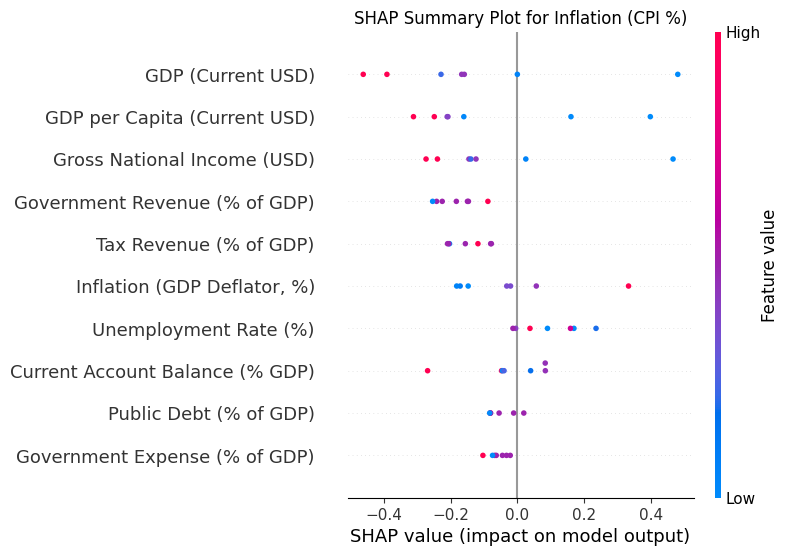


SHAP Summary Plot for: Interest Rate (Real, %)


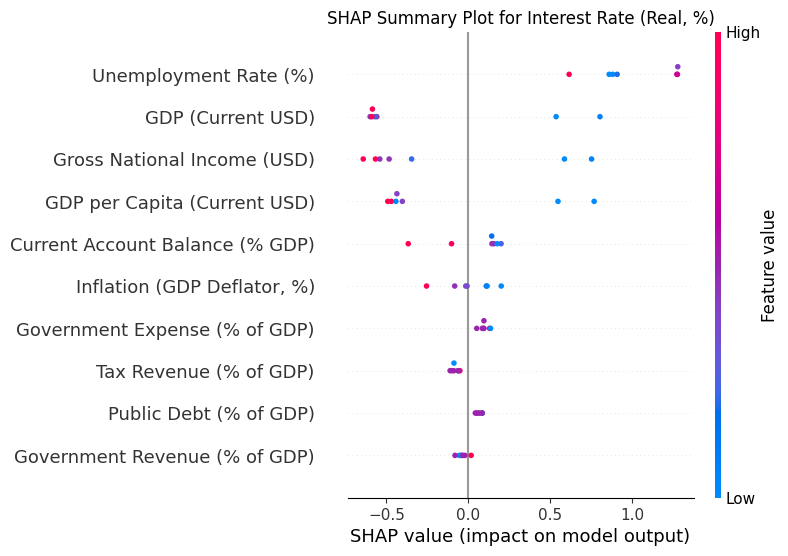


SHAP Summary Plot for: GDP Growth (% Annual)


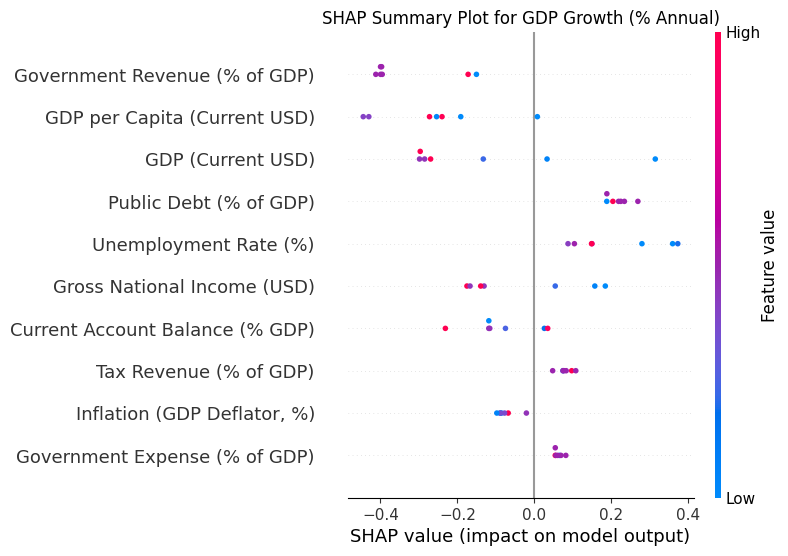

In [ ]:
import matplotlib.pyplot as plt

# Assuming target_cols is defined as ['Inflation (CPI %)', 'Interest Rate (Real, %)', 'GDP Growth (% Annual)']
# And shap_values is a list of arrays, one for each target

# Visualize SHAP summary plots for each target variable
for i, target_col in enumerate(target_cols):
    print(f"\nSHAP Summary Plot for: {target_col}")
    # Correctly slice shap_values for the i-th target output
    shap.summary_plot(shap_values[:, :, i], x_test, feature_names=x_test.columns, show=False)
    plt.title(f'SHAP Summary Plot for {target_col}')
    plt.show()

### Feature Importance

Feature Importances:


,Feature,Importance
2,Unemployment Rate (%),0.224304
7,Tax Revenue (% of GDP),0.117464
0,GDP (Current USD),0.111040
3,"Inflation (GDP Deflator, %)",0.101601
1,GDP per Capita (Current USD),0.101537
9,Public Debt (% of GDP),0.090498
8,Gross National Income (USD),0.089699
4,Current Account Balance (% GDP),0.070995
5,Government Expense (% of GDP),0.060500
6,Government Revenue (% of GDP),0.032361


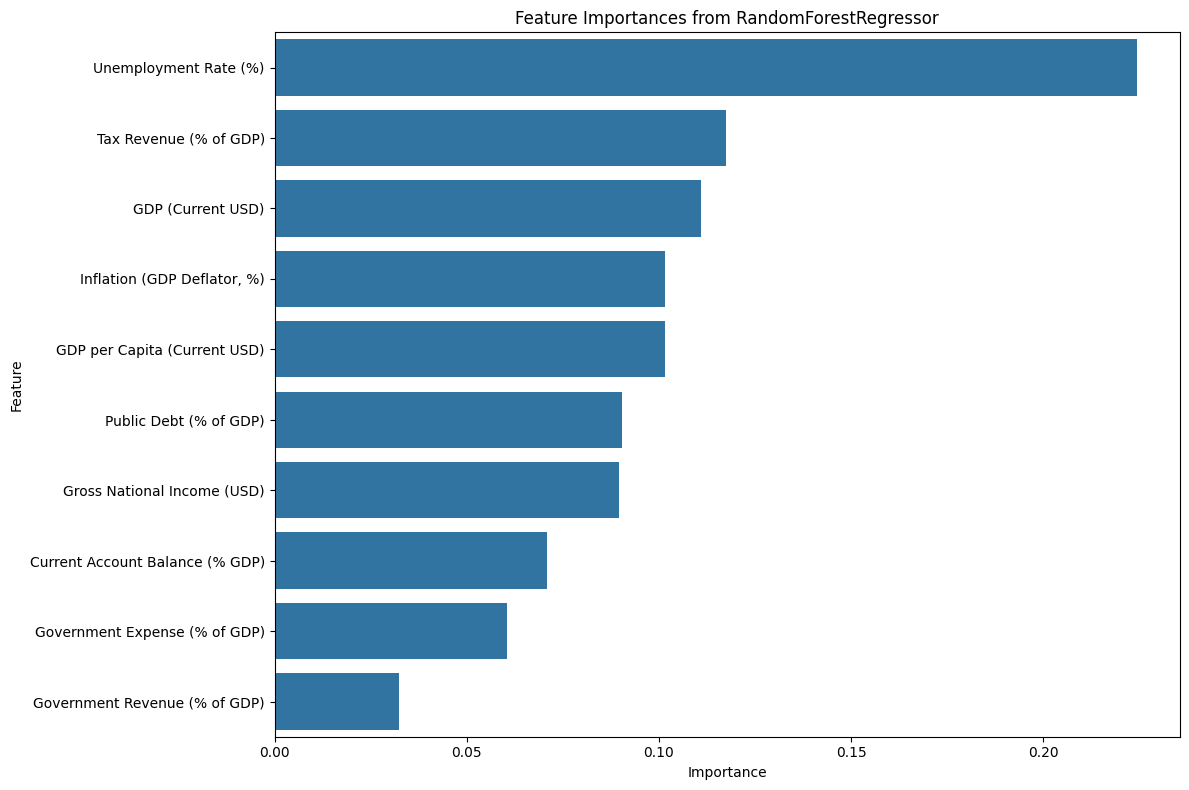

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get feature names from x_train
feature_names = x_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
display(importance_df)

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### PCA Loading Factors for Target Variables

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Ensure y is clean before scaling for PCA
# Impute missing values in y
for col in y.columns:
    if y[col].isnull().any():
        mean_value = y[col].mean()
        y[col] = y[col].fillna(mean_value)

# Scale the target variables first
scaler = StandardScaler()
targets_scaled = scaler.fit_transform(y)
targets_scaled_df = pd.DataFrame(targets_scaled, columns=y.columns, index=y.index)

# Use the already scaled target variables (targets_scaled_df)
x_targets_for_pca = targets_scaled_df.copy()

pca_targets_loadings = PCA()
pca_targets_loadings.fit(x_targets_for_pca)

loading_factors_targets = pca_targets_loadings.components_.T
loading_factors_targets_df = pd.DataFrame(
    loading_factors_targets,
    columns=[f"PC{i+1}" for i in range(pca_targets_loadings.n_components_)],
    index=y.columns # Use original column names for readability
)

print("PCA Loading Factors for Target Variables:")
display(loading_factors_targets_df)

PCA Loading Factors for Target Variables:


/tmp/ipython-input-1235978575.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[col] = y[col].fillna(mean_value)


,PC1,PC2,PC3
Inflation (CPI %),0.669828,-0.171945,0.722334
"Interest Rate (Real, %)",0.373115,0.919020,-0.127228
GDP Growth (% Annual),0.641963,-0.354734,-0.679741


### OLS

In [ ]:
x_new = y[['Inflation (CPI %)', 'Interest Rate (Real, %)']]
y_new = y[['GDP Growth (% Annual)']]

print("First 5 rows of  x_new:")
display(x_new.head())

print("\ nFirst 5 rows of y_new:")
display(y_new.head())

First 5 rows of  x_new:


<>:7: SyntaxWarning: invalid escape sequence '\ '
<>:7: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-1460521705.py:7: SyntaxWarning: invalid escape sequence '\ '
  print("\ nFirst 5 rows of y_new:")


,Inflation (CPI %),"Interest Rate (Real, %)"
1088,2.492655,-1.072045
1089,3.856112,-1.659550
1090,2.573235,-1.026901
1091,2.291667,-1.576192
1092,1.451120,-0.808243


\ nFirst 5 rows of y_new:


,GDP Growth (% Annual)
1088,2.233315
1089,1.138362
1090,1.508998
1091,1.799921
1092,3.194637


### Split Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

print("x_train_new shape:", x_train_new.shape)
print("x_test_new shape:", x_test_new.shape)
print("y_train_new shape:", y_train_new.shape)
print("y_test_new shape:", y_test_new.shape)

print("\nFirst 5 rows of x_train_new:")
display(x_train_new.head())

print("\nFirst 5 rows of y_train_new:")
display(y_train_new.head())

x_train_new shape: (25, 2)
x_test_new shape: (7, 2)
y_train_new shape: (25, 1)
y_test_new shape: (7, 1)

First 5 rows of x_train_new:


,Inflation (CPI %),"Interest Rate (Real, %)"
1401,3.030587,8.629405
1100,7.922049,3.992893
1088,2.492655,-1.072045
1092,1.451120,-0.808243
1392,5.134204,-1.746098



First 5 rows of y_train_new:


,GDP Growth (% Annual)
1401,5.019288
1100,4.839085
1088,2.233315
1092,3.194637
1392,6.223854


In [ ]:
import statsmodels.api as sm

# Add a constant to the independent variables (required for statsmodels OLS)
X_train_ols = sm.add_constant(x_train_new)

# Create and fit the OLS model
ols_model = sm.OLS(y_train_new, X_train_ols)
ols_results = ols_model.fit()

# Print the summary of the regression results
print(ols_results.summary())

                              OLS Regression Results                             
Dep. Variable:     GDP Growth (% Annual)   R-squared:                       0.162
Model:                               OLS   Adj. R-squared:                  0.085
Method:                    Least Squares   F-statistic:                     2.120
Date:                   Sun, 30 Nov 2025   Prob (F-statistic):              0.144
Time:                           16:13:22   Log-Likelihood:                -64.564
No. Observations:                     25   AIC:                             135.1
Df Residuals:                         22   BIC:                             138.8
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------